<a href="https://colab.research.google.com/github/carolyn155/cisc351_course_project/blob/master/TradingAlg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# install required dependencies
!pip install matplotlib keras --no-cache-dir
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc2)


In [0]:
import pandas as pd
import numpy as np
import matplotlib

# Description 

The dataset used for this experiment is the New York Stock Exchange dataset from Kaggle, found at https://www.kaggle.com/dgawlik/nyse. 

The trading algorithm is constructed to predict stock trading for Netflix and for Yahoo, which are both large technology companies based in California. These companies are both in the Information Technology GICS Sector, and in the Internet Software & Services GICS Sub Industry.

# Import Data and Data Exploration 

In [0]:
pd.set_option('max_columns', None)

## Securities dataset

In [46]:
# import the securities data to a dataframe 
# securities = pd.read_csv("./nyse/securities.csv")
securities = pd.read_csv("./securities.csv")
securities.head(5)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [47]:
# get info on the securities data for the GCIS Sector column 
num_securities = len(securities) # get the number of securities 
gics_sector_values = np.unique(securities['GICS Sector']) # get the unique GICS Sector Values 

print('The number of securities is', num_securities)
print('\nThe GICS Sectors are',  sep=', ', *gics_sector_values)

The number of securities is 505

The GICS Sectors are, Consumer Discretionary, Consumer Staples, Energy, Financials, Health Care, Industrials, Information Technology, Materials, Real Estate, Telecommunications Services, Utilities


In [48]:
# get the rows where the value in GICS Sector column is 'Information Technology'
it_securities = securities.loc[securities['GICS Sector'] == 'Information Technology'] # get the IT securities
num_it_securities = len(it_securities) # get the number of IT securities 
it_securities_symbols = np.unique(it_securities['Ticker symbol']) # get the unique GICS Sector Values 

print('The number of IT securities is', num_it_securities)
print('The ticker symbols of the IT securities are ', sep=', ', *it_securities_symbols)

The number of IT securities is 68
The ticker symbols of the IT securities are , AAPL, ACN, ADBE, ADI, ADP, ADS, ADSK, AKAM, AMAT, APH, ATVI, AVGO, CA, CRM, CSCO, CSRA, CTSH, CTXS, EA, EBAY, FB, FFIV, FIS, FISV, FLIR, FSLR, GLW, GOOG, GOOGL, GPN, HPE, HPQ, HRS, IBM, INTC, INTU, JNPR, KLAC, LLTC, LRCX, MA, MCHP, MSFT, MSI, MU, NFLX, NTAP, NVDA, ORCL, PAYX, PYPL, QCOM, QRVO, RHT, STX, SWKS, SYMC, TDC, TEL, TSS, TXN, V, VRSN, WDC, WU, XLNX, XRX, YHOO


In [49]:
# get info on the securities data for the GICS Sub Industry column for values in the IT GCIS Sector 
gics_sub_it_values = np.unique(it_securities['GICS Sub Industry']) # get the unique GICS Sub Industry values 

print('\nThe GICS Sub Industries in the IT GCIS Sector are',  sep=', ', *gics_sub_it_values)


The GICS Sub Industries in the IT GCIS Sector are, Application Software, Computer Hardware, Computer Storage & Peripherals, Data Processing & Outsourced Services, Electronic Components, Electronic Equipment & Instruments, Electronic Manufacturing Services, Home Entertainment Software, IT Consulting & Other Services, Internet Software & Services, Networking Equipment, Semiconductor Equipment, Semiconductors, Systems Software, Technology Hardware, Storage & Peripherals, Telecommunications Equipment


In [50]:
# Get the values where the value in the GICS Sub Industry column is 'Internet Software & Services' from the dataframe 
# where the value in the GICS sector column is 'Infromation Technology'
soft_securities = it_securities.loc[it_securities['GICS Sub Industry'] == 'Internet Software & Services'] 
num_soft_securities = len(soft_securities)
soft_securities_symbols = np.unique(soft_securities['Ticker symbol']) # get the unique GICS Sub Industry values 

print('The number of Internet Software & Services securities is', num_soft_securities)
print('The ticker symbols of the Internet Software & Services securities are', sep=', ', *soft_securities_symbols)

The number of Internet Software & Services securities is 20
The ticker symbols of the Internet Software & Services securities are, ADP, AKAM, CRM, CTXS, EBAY, FB, FIS, FISV, GOOG, GOOGL, INTU, MA, NFLX, NTAP, PAYX, TSS, V, VRSN, WU, YHOO


In [51]:
# drop the columns that are now constant for the soft_securities dataframe 
soft_securities = soft_securities.drop(columns=['GICS Sector', 'GICS Sub Industry'])
soft_securities.head(5)

,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
14,AKAM,Akamai Technologies Inc,reports,"Cambridge, Massachusetts",2007-07-12,1086222
23,GOOGL,Alphabet Inc Class A,reports,"Mountain View, California",2014-04-03,1652044
24,GOOG,Alphabet Inc Class C,reports,"Mountain View, California",NaN,1652044
53,ADP,Automatic Data Processing,reports,"Roseland, New Jersey",1981-03-31,8670
109,CTXS,Citrix Systems,reports,"Fort Lauderdale, Florida",NaN,877890


In [52]:
# select the securities for Yahoo and Netflix
yahoo_sec = soft_securities.loc[soft_securities['Ticker symbol'] == "YHOO"]
netflix_sec = soft_securities.loc[soft_securities['Ticker symbol'] == "NFLX"] 

print('The Yahoo security is:') 
display(yahoo_sec)

print('\nThe Netflix security is:')
display(netflix_sec)

The Yahoo security is:


,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
500,YHOO,Yahoo Inc.,reports,"Sunnyvale, California",NaN,1011006



The Netflix security is:


,Ticker symbol,Security,SEC filings,Address of Headquarters,Date first added,CIK
322,NFLX,Netflix Inc.,reports,"Los Gatos, California",2010-12-20,1065280


## Prices dataset

Since we have the adjusted prices, this dataset is not used for constructing the model.

In [53]:
# prices dataset 
# prices = pd.read_csv("./nyse/prices.csv", parse_dates=['date'])
prices = pd.read_csv("./prices.csv", parse_dates=['date'])
prices.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [54]:
# select all the stocks for Netflix and set the index to date
# https://www.kaggle.com/residentmario/time-series-plotting-optional
netflix_prices = prices.loc[prices['symbol'] == "NFLX"].set_index('date')
netflix_prices.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0
2010-01-05,NFLX,53.570001,51.510001,50.810001,53.599998,23753100.0
2010-01-06,NFLX,51.530001,53.319999,50.380002,53.710001,23290400.0
2010-01-07,NFLX,54.120000,52.400001,52.240001,54.300001,9955400.0
2010-01-08,NFLX,52.490000,53.300002,52.260001,54.199999,8180900.0


In [55]:
# do the same for Yahoo
yahoo_prices = prices.loc[prices['symbol'] == "YHOO"].set_index('date')
yahoo_prices.head(5)

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f73fce51c50>],
      dtype=object)

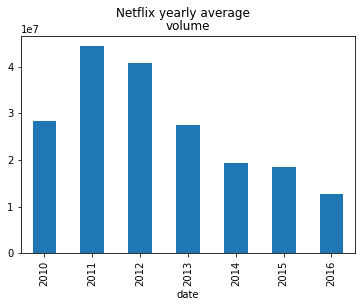

In [56]:
# visualize the Google stock data by year
# https://www.kaggle.com/residentmario/time-series-plotting-optional

df_avg_vol = netflix_prices['volume'].resample('Y').mean()
df_avg_vol.index = df_avg_vol.index.year
netflix_avg_vol.plot.bar(x='date [year]', y='average volume', title='Netflix yearly average', subplots=True)

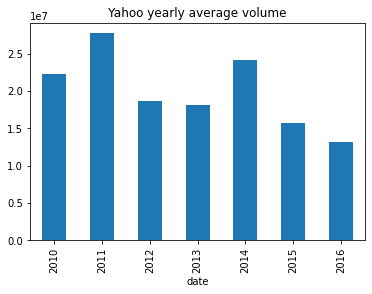

In [57]:
# do the same for Yahoo
yahoo_avg_vol = yahoo_prices['volume'].resample('Y').mean()
yahoo_avg_vol.index = yahoo_avg_vol.index.year
yahoo_avg_vol.plot.bar(x='date [year]', y='average volume', title='Yahoo yearly average volume')

## Fundamentals dataset 

In [58]:
# fundamentals = pd.read_csv("./nyse/fundamentals.csv")
fundamentals = pd.read_csv("./fundamentals.csv")
fundamentals = fundamentals.rename(columns={'Unnamed: 0': 'idx'})
fundamentals.index = fundamentals.idx
fundamentals = fundamentals.drop(columns=['idx'])
fundamentals.head(5)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.5620

In [59]:
# check if the ticker symbols in the list from soft_securities are the same in fundamentals 
# make a sub array for this 
soft_fundamentals = fundamentals.loc[fundamentals['Ticker Symbol'].isin(soft_securities_symbols)]
soft_fundamentals.head(5)

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72,AKAM,2012-12-31,176378000.0,-2108000.0,7104000.0,9.0,-166773000.0,5.195543e+09,216.0,201989000.0,0.0,2015000.0,529900000.0,359.0,21427000.0,2565000.0,204163000.0,321591000.0,321591000.0,-89000.0,0.0,345091000.0,7.237010e+08,61.0,8.440470e+08,117602000.0,84554000.0,0.0,0.0,-222277000.0,59946000.0,0.0,657659000.0,0.0,0.0,0.0,-357208000.0,530020000.0,-108029000.0,-7.791100e+08,203989000.0,61438000.0,203989000.0,203989000.0,239199000.0,406000.0,314487000.0,23.0,39811000.0,51604000.0,2.656600e+07,-1640000.0,-34690000.0,-390060000.0,49364000.0,2592000.0,20962000.0,23.0,14.0,15.0,359.0,74744000.0,-2.225702e+09,-96354000.0,4.334480e+08,0.0,235592000.0,2.600627e+09,7.283840e+08,2.029440e+08,2.345754e+09,2.548730e+08,2.600627e+09,1.373947e+09,-624462000.0,2012.0,1.15,1.773817e+08
73,AKAM,2013-12-31,224095000.0,-67184000.0,5586000.0,11.0,-187964000.0,4.561929e+09,256.0,333891000.0,0.0,1808000.0,511087000.0,391.0,2325000.0,7936000.0,184431000.0,419554000.0,419554000.0,-3655000.0,0.0,450287000.0,7.573680e+08,68.0,1.066835e+09,126067000.0,77429000.0,0.0,0.0,-19750000.0,52080000.0,0.0,573026000.0,0.0,0.0,0.0,131902000.0,563908000.0,-115243000.0,-3.131080e+08,293487000.0,101602000.0,293487000.0,293487000.0,293722000.0,1843000.0,413968000.0,26.0,67536000.0,62096000.0,3.907100e+07,-2091000.0,-41332000.0,-105394000.0,57152000.0,-508000.0,21547000.0,27.0,16.0,19.0,391.0,93879000.0,-1.932215e+09,-96712000.0,5.355980e+08,0.0,340005000.0,2.957685e+09,1.029714e+09,2.631660e+08,2.629431e+09,3.282540e+08,2.957685e+09,1.577922e+09,0.0,2013.0,1.65,1.778709e+08
74,AKAM,2014-12-31,282098000.0,-58397000.0,5720000.0,11.0,-207159000.0,4.559430e+09,227.0,238650000.0,0.0,1783000.0,610943000.0,378.0,1955000.0,43128000.0,262869000.0,495239000.0,479776000.0,-10532000.0,0.0,601591000.0,1.051294e+09,69.0,1.352931e+09,145828000.0,132412000.0,15463000.0,0.0,-479392000.0,101721000.0,604851000.0,869992000.0,0.0,0.0,660873000.0,-95241000.0,658070000.0,436027000.0,-1.178806e+09,333948000.0,56443000.0,333948000.0,333948000.0,375282000.0,1189000.0,489519000.0,25.0,81747000.0,128981000.0,5.191300e+07,-17611000.0,-52224000.0,-492255000.0,74221000.0,-38514000.0,32057000.0,24.0,16.0,17.0,378.0,125286000.0,-1.598267e+09,-103568000.0,7.048800e+08,0.0,519642000.0,4.001546e+09,1.262555e+09,3.340110e+08,2.945335e+09,1.056211e+09,4.001546e+09,1.963874e+09,0.0,2014.0,1.87,1.785818e+08
75,AKAM,201

In [60]:
soft_fundamentals.describe()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,68.000000,68.000000,68.000000,68.000000,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,6.800000e+01,63.000000,59.000000,5.900000e+01
mean,1.220831e+09,-9.752422e+07,2.305987e+08,76.147059,-3.669658e+08,7.186608e+09,158.911765,2.085974e+09,7.913529e+05,1.536861e+08,1.743619e+09,233.514706,1.231675e+08,1.104988e+09,7.080881e+08,1.984866e+09,1.925224e+09,-2.728666e+07,4.840374e+07,1.010938e+09,3.878708e+09,67.544118,4.250491e+09,5.598192e+08,1.860245e+09,5.964271e+07,8.171574e+06,-3.168639e+08,2.005440e+08,1.836478e+09,1.959836e+09,1.281543e+07,4.189279e+06,4.929729e+08,1.809251e+08,1.971450e+09,-7.020578e+08,-1.062063e+09,1.434091e+09,-8.204222e+07,1.432317e+09,1.411883e+09,1.074628e+09,9.544096e+07,1.730974e+09,27.588235,5.184057e+08,1.033073e+09,1.537813e+09,5.449236e+08,-6.993971e+06,-3.782335e+08,4.956915e+08,-2.765093e+08,5.945732e+07,31.323529,97.514706,24.088235,233.235294,5.521731e+08,3.447714e+09,-1.031644e+09,1.815974e+09,6.274394e+08,1.827070e+09,1.538022e+10,6.028917e+09,3.386083e+09,8.539972e+09,6.840245e+09,1.538022e+10,5.994110e+09,-2.877034e+09,2013.936508,1.841186,5.499556e+08
std,1.240152e+09,2.607868e+08,1.381831e+09,413.912900,6.481157e+08,8.393315e+09,218.145969,2.136252e+09,7.488910e+06,5.952021e+08,1.393547e+09,245.029300,5.606735e+08,2.749162e+09,8.627779e+08,2.877740e+09,2.879927e+09,6.626136e+07,1.886865e+08,1.331560e+09,4.703768e+09,22.667903,4.114181e+09,1.042655e+09,4.048254e+09,8.262302e+07,3.028399e+07,1.532962e+09,8.577473e+08,2.803574e+09,6.819011e+09,3.340708e+07,1.387594e+07,2.077269e+09,1.022805e+09,2.763911e+09,1.696634e+09,2.539364e+09,2.263661e+09,2.269524e+09,2.264393e+09,2.275009e+09,1.705465e+09,5.

## Prices split adjusted dataset

In [61]:
# get the prices split adjusted dataset and store in a dataframe 
# prices_adj = pd.read_csv("./nyse/prices-split-adjusted.csv", parse_dates=['date'])
prices_adj = pd.read_csv("./prices-split-adjusted.csv", parse_dates=['date'])
prices_adj.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [62]:
# get the prices split adjusted for only the symbols in the Internet Software & Services  
# mke a sub array for this
soft_prices_adj = prices_adj.loc[prices_adj['symbol'].isin(soft_securities_symbols)]
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0
273,2010-01-04,AKAM,25.629999,25.920000,25.530001,26.059999,3015600.0
355,2010-01-04,CRM,18.652500,18.705000,18.547501,18.882500,7906000.0
361,2010-01-04,CTXS,42.040001,42.840000,41.910000,42.869999,1680700.0
389,2010-01-04,EBAY,9.983165,10.058923,9.941077,10.092592,22511600.0


# Feature Engineering

In [0]:
# filter the warnings out 
import warnings
warnings.filterwarnings("ignore")

## Parse date

### soft_prices_adj

In [64]:
# convert date column in soft_prices_adj to datetime type 
soft_prices_adj['date'] = pd.to_datetime(soft_prices_adj['date']) 
soft_prices_adj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34486 entries, 261 to 851257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    34486 non-null  datetime64[ns]
 1   symbol  34486 non-null  object        
 2   open    34486 non-null  float64       
 3   close   34486 non-null  float64       
 4   low     34486 non-null  float64       
 5   high    34486 non-null  float64       
 6   volume  34486 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ MB


In [65]:
# parse date to different features for datetime datatype in soft_prices adj
soft_prices_adj['year'] = soft_prices_adj.date.dt.year
soft_prices_adj['month'] = soft_prices_adj.date.dt.month
soft_prices_adj['day'] = soft_prices_adj.date.dt.day
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume,year,month,day
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0,2010,1,4
273,2010-01-04,AKAM,25.629999,25.920000,25.530001,26.059999,3015600.0,2010,1,4
355,2010-01-04,CRM,18.652500,18.705000,18.547501,18.882500,7906000.0,2010,1,4
361,2010-01-04,CTXS,42.040001,42.840000,41.910000,42.869999,1680700.0,2010,1,4
389,2010-01-04,EBAY,9.983165,10.058923,9.941077,10.092592,22511600.0,2010,1,4


In [66]:
# sort values by the date and symbol 
soft_prices_adj.sort_values(['symbol', 'date'], inplace=True)
soft_prices_adj.head(5)

,date,symbol,open,close,low,high,volume,year,month,day
261,2010-01-04,ADP,38.226514,37.603162,37.489027,38.226514,3930100.0,2010,1,4
728,2010-01-05,ADP,37.445127,37.401232,37.199301,37.673399,3252400.0,2010,1,5
1196,2010-01-06,ADP,37.576823,37.313436,36.918352,37.655840,3111400.0,2010,1,6
1664,2010-01-07,ADP,36.988588,37.295874,36.953471,37.313436,2513300.0,2010,1,7
2132,2010-01-08,ADP,37.243197,37.243197,36.909571,37.278314,2310400.0,2010,1,8


### soft_fundamentals

In [67]:
# convert date column in soft_fundamentals to datetime type 
soft_fundamentals['Period Ending'] = pd.to_datetime(soft_fundamentals['Period Ending']) 
soft_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 72 to 1764
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Ticker Symbol                                        68 non-null     object        
 1   Period Ending                                        68 non-null     datetime64[ns]
 2   Accounts Payable                                     68 non-null     float64       
 3   Accounts Receivable                                  68 non-null     float64       
 4   Add'l income/expense items                           68 non-null     float64       
 5   After Tax ROE                                        68 non-null     float64       
 6   Capital Expenditures                                 68 non-null     float64       
 7   Capital Surplus                                      68 non-null     float64       
 8  

In [68]:
# shift a year ahead in securities to avoid data leakage (i.e. use 2012 data in 2013), suggested by: 
# https://www.kaggle.com/benjibb/entity-embedding-neural-network#Data-preprocessin
soft_fundamentals['year_inc'] = soft_fundamentals['For Year'] + 1
soft_fundamentals.year_inc.fillna(soft_fundamentals['Period Ending'].dt.year + 1, inplace=True) # fill in missing values with year of period ending+1
soft_fundamentals = soft_fundamentals.drop(columns=['For Year', 'Period Ending'])
soft_fundamentals.year_inc = soft_fundamentals.year_inc.astype(int) # convert to int 
soft_fundamentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 72 to 1764
Data columns (total 77 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        68 non-null     object 
 1   Accounts Payable                                     68 non-null     float64
 2   Accounts Receivable                                  68 non-null     float64
 3   Add'l income/expense items                           68 non-null     float64
 4   After Tax ROE                                        68 non-null     float64
 5   Capital Expenditures                                 68 non-null     float64
 6   Capital Surplus                                      68 non-null     float64
 7   Cash Ratio                                           68 non-null     float64
 8   Cash and Cash Equivalents                            68 non-null     

In [69]:
# sort values by the date and symbol 
soft_fundamentals.sort_values(['Ticker Symbol', 'year_inc'], inplace=True)
soft_fundamentals.head(5)

,Ticker Symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding,year_inc
idx,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72,AKAM,176378000.0,-2108000.0,7104000.0,9.0,-166773000.0,5.195543e+09,216.0,201989000.0,0.0,2015000.0,529900000.0,359.0,21427000.0,2565000.0,204163000.0,321591000.0,321591000.0,-89000.0,0.0,345091000.0,7.237010e+08,61.0,8.440470e+08,117602000.0,84554000.0,0.0,0.0,-222277000.0,59946000.0,0.0,657659000.0,0.0,0.0,0.0,-357208000.0,530020000.0,-108029000.0,-7.791100e+08,203989000.0,61438000.0,203989000.0,203989000.0,239199000.0,406000.0,314487000.0,23.0,39811000.0,51604000.0,2.656600e+07,-1640000.0,-34690000.0,-390060000.0,49364000.0,2592000.0,20962000.0,23.0,14.0,15.0,359.0,74744000.0,-2.225702e+09,-96354000.0,4.334480e+08,0.0,235592000.0,2.600627e+09,7.283840e+08,2.029440e+08,2.345754e+09,2.548730e+08,2.600627e+09,1.373947e+09,-624462000.0,1.15,1.773817e+08,2013
73,AKAM,224095000.0,-67184000.0,5586000.0,11.0,-187964000.0,4.561929e+09,256.0,333891000.0,0.0,1808000.0,511087000.0,391.0,2325000.0,7936000.0,184431000.0,419554000.0,419554000.0,-3655000.0,0.0,450287000.0,7.573680e+08,68.0,1.066835e+09,126067000.0,77429000.0,0.0,0.0,-19750000.0,52080000.0,0.0,573026000.0,0.0,0.0,0.0,131902000.0,563908000.0,-115243000.0,-3.131080e+08,293487000.0,101602000.0,293487000.0,293487000.0,293722000.0,1843000.0,413968000.0,26.0,67536000.0,62096000.0,3.907100e+07,-2091000.0,-41332000.0,-105394000.0,57152000.0,-508000.0,21547000.0,27.0,16.0,19.0,391.0,93879000.0,-1.932215e+09,-96712000.0,5.355980e+08,0.0,340005000.0,2.957685e+09,1.029714e+09,2.631660e+08,2.629431e+09,3.282540e+08,2.957685e+09,1.577922e+09,0.0,1.65,1.778709e+08,2014
74,AKAM,282098000.0,-58397000.0,5720000.0,11.0,-207159000.0,4.559430e+09,227.0,238650000.0,0.0,1783000.0,610943000.0,378.0,1955000.0,43128000.0,262869000.0,495239000.0,479776000.0,-10532000.0,0.0,601591000.0,1.051294e+09,69.0,1.352931e+09,145828000.0,132412000.0,15463000.0,0.0,-479392000.0,101721000.0,604851000.0,869992000.0,0.0,0.0,660873000.0,-95241000.0,658070000.0,436027000.0,-1.178806e+09,333948000.0,56443000.0,333948000.0,333948000.0,375282000.0,1189000.0,489519000.0,25.0,81747000.0,128981000.0,5.191300e+07,-17611000.0,-52224000.0,-492255000.0,74221000.0,-38514000.0,32057000.0,24.0,16.0,17.0,378.0,125286000.0,-1.598267e+09,-103568000.0,7.048800e+08,0.0,519642000.0,4.001546e+09,1.262555e+09,3.340110e+08,2.945335e+09,1.056211e+09,4.001546e+09,1.963874e+09,0.0,1.87,1.785818e+08,2015
75,AKAM,278148000.0,-56247000.0,8999000.0,10.0,-311676000.0,4.437

# Preprocessing

## Merge all features to one dataframe

Merge all features to one dataframe, combining soft_prices_adj and soft_fundamentals to one dataframe. Select values for the Yahoo ticker for analysis. 

In [70]:
# merge dataframes soft_prices_adj and soft_fundamentals to soft_df
soft_df = pd.merge(soft_prices_adj, soft_fundamentals, left_on=['symbol', 'year'], right_on=['Ticker Symbol', 'year_inc'])
soft_df = soft_df.drop(columns=['Ticker Symbol', 'year_inc']) # drop duplicate columms

# for yahoo ticker 
soft_df = soft_df.loc[soft_df['symbol'] == 'YHOO']

# set the index of the merged dataset
soft_df.set_index(['symbol', 'date'], inplace=True) # update the index
soft_df.sort_index(inplace=True)
soft_df.head(5)

open      close        low       high      volume  \
symbol date                                                                 
YHOO   2013-01-02  20.200001  20.080000  20.010000  20.320000  20463100.0   
       2013-01-03  20.049999  19.780001  19.719999  20.100000  19504400.0   
       2013-01-04  19.760000  19.860001  19.719999  19.950001  12489600.0   
       2013-01-07  19.559999  19.400000  19.280001  19.580000  23864500.0   
       2013-01-08  19.320000  19.660000  19.299999  19.680000  16931700.0   

                   year  month  day  Accounts Payable  Accounts Receivable  \
symbol date                                                                  
YHOO   2013-01-02  2013      1    2       993306000.0           34752000.0   
       2013-01-03  2013      1    3       993306000.0           34752000.0   
       2013-01-04  2013      1    4       993306000.0           34752000.0   
       2013-01-07  2013      1    7       993306000.0           34752000.0   
       2013-01-08  2013      1    8       993306000.0           34752000.0   

                   Add'l income/expense items  After Tax ROE  \
symbol date                                                    
YHOO   2013-01-02                4.647839e+09           27.0   
       2013-01-03                4.647839e+09           27.0   
       2013-01-04                4.647839e+09           27.0   
       2013-01-07                4.647839e+09           27.0   
       2013-01-08                4.647839e+09           27.0   

                   Capital Expenditures  Capital Surplus  Cash Ratio  \
symbol date                                                            
YHOO   2013-01-02          -505507000.0     9.563348e+09       324.0   
       2013-01-03          -505507000.0     9.563348e+09       324.0   
       2013-01-04          -505507000.0     9.563348e+09       324.0   
       2013-01-07          -505507000.0     9.563348e+09       324.0   
       2013-01-08          -505507000.0     9.563348e+09       324.0   

                   Cash and Cash Equivalents  Changes in Inventories  \
symbol date                                                            
YHOO   2013-01-02               2.667778e+09                     0.0   
       2013-01-03               2.667778e+09                     0.0   
       2013-01-04               2.667778e+09                     0.0   
       2013-01-07               2.667778e+09                     0.0   
       2013-01-08               2.667778e+09                     0.0   

                   Common Stocks  Cost of Revenue  Current Ratio  \
symbol date                                                        
YHOO   2013-01-02      1187000.0     1.620566e+09          438.0   
       2013-01-03      1187000.0     1.620566e+09          438.0   
       2013-01-04      1187000.0     1.620566e+09          438.0   
       2013-01-07      1187000.0     1.620566e+09          438.0   
       2013-01-08      1187000.0     1.620566e+09          438.0   

                   Deferred Asset Charges  Deferred Liability Charges  \
symbol date                                                             
YHOO   2013-01-02                     0.0                1.082831e+09   
       2013-01-03                     0.0                1.082831e+09   
       2013-01-04                     0.0                1.082831e+09   
       2013-01-07                     0.0                1.082831e+09   
       2013-01-08                     0.0                1.082831e+09   

                   Depreciation  Earnings Before Interest and Tax  \
symbol date                                                         
YHOO   2013-01-02   654601000.0                      5.214207e+09   
       2013-01-03   654601000.0                      5.214207e+09   
       2013-01-04   654601000.0                      5.214207e+09   
       2013-01-07   654601000.0                      5.214207e+09   
       2013-01-08   654601000.0                      5.214207e+09   

     

## Drop NA values 

In [0]:
# drop all na values in the dataframe
soft_df_shape_na = soft_df.shape # get the shape of the soft_df dataframe prior to dropping NA values 
soft_df.dropna(inplace=True)

In [72]:
# observe the shape of soft_df after dropping NA values 
print('The shape of soft_prices_adj is', soft_prices_adj.shape)
print('The shape of soft_fundamentals is', soft_fundamentals.shape)
print('The shape of soft_df before dropping NA values was', soft_df_shape_na)
print('The shape of soft_df after dropping NA values is', soft_df.shape)
print('\nThe number of rows in soft_df that were dropped was', soft_df_shape_na[0] - soft_df.shape[0])

The shape of soft_prices_adj is (34486, 10)
The shape of soft_fundamentals is (68, 77)
The shape of soft_df before dropping NA values was (1008, 83)
The shape of soft_df after dropping NA values is (1008, 83)

The number of rows in soft_df that were dropped was 0


## Normalize the dataset

In [0]:
from sklearn import preprocessing

# define function for normalizing columns 
def normalize_data(df):
    # make the scaler 
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    
    # iterate through columns in the dataframe to normalize each column individually
    for col in df.columns:
      df[col] = min_max_scaler.fit_transform(df[col].values.reshape(-1,1))  # fit the data with the scaler 
    
    # return the normalized dataframe
    return df, min_max_scaler

In [0]:
# function to denormalize 
def denormalize_data(df, df_norm): 
    # reshape arrays
    # df = df['close'].values.reshape(-1,1) # pretty sure ive already done this 
    norm = norm.reshape(-1,1)
    
    # create MinMaxScaler for the data
    min_max_scaler = preprocessing.MinMaxScaler()
    df_scaled = min_max_scaler.fit_transform(df)
    df_norm_inv = min_max_scaler.inverse_transform(df_norm)
    
    # return inverted array of normalized values
    return df_norm_inv

In [0]:
# normalize the dataset by each column
soft_dt_unscaled = soft_df.copy() # save a copy of the original unscaled datafame 
soft_df, scaler = normalize_data(soft_df)

# Data Exploration

In [0]:
import matplotlib.pyplot as plt

# def plot_results(train_y, test_y, pred_train_y, pred_test_y):
#   plt.figure(figsize=(15, 5))
#   plt.subplot(1,2,1)

#   plt.plot(np.arange(train_y.shape[0]),train_y, color='blue', label='train target')

#   plt.plot(np.arange(train_y.shape[0]), pred_train_y, color='green',
#           label='train prediction')

#   plt.plot(np.arange(train_y.shape[0], train_y.shape[0] + test_y.shape[0]), test_y,
#           color='gray', label='test target')

#   plt.plot(np.arange(train_y.shape[0], y_train0.shape[0] + pred_test_y.shape[0]), pred_test_y, color='red',
#           label='test prediction')

#   plt.title('past and future stock prices')
#   plt.xlabel('time [days]')
#   plt.ylabel('normalized price')
#   plt.legend(loc='best');

# Feature Selection

A feature selection experiment was conducted to determine which features should be included as input for the model. This feature selection experiment will use two different methods to select features, and compare accuracy results of the model with the two different feature sets. The method that produced the highest accuracy for the model is the better method. 

The two methods used for the feature selection experiment are:
1. Manually select features by observing variance and correlation 
2. Select features with a feature selection model
3. Only data from prices_split_adj dataset
4. Single variant prediction, using only the close values  


As we also want to test the baseline model, create a feature set with all the features minus those that were created with feature engineering

In [77]:
# test only the features we are unsure of keeping, obtained from merging with soft_fundamentals
features = soft_df.columns # save the current feature set 
keep_features_list = ['open', 'close', 'low', 'high', 'volume', 'year', 'month', 'day']
test_features_list = np.array(soft_df.drop(columns=keep_features_list).columns)
test_features = soft_df[test_features_list]

# display features we are keeping/testing 
print('Features we are keeping, obtained from the soft_prices_adj dataframe, are', sep=', ', *keep_features_list)
print('\nFeatures we are testing, obtained from the soft_fundamentals dataframe, are', sep=', ', *test_features_list)

Features we are keeping, obtained from the soft_prices_adj dataframe, are, open, close, low, high, volume, year, month, day

Features we are testing, obtained from the soft_fundamentals dataframe, are, Accounts Payable, Accounts Receivable, Add'l income/expense items, After Tax ROE, Capital Expenditures, Capital Surplus, Cash Ratio, Cash and Cash Equivalents, Changes in Inventories, Common Stocks, Cost of Revenue, Current Ratio, Deferred Asset Charges, Deferred Liability Charges, Depreciation, Earnings Before Interest and Tax, Earnings Before Tax, Effect of Exchange Rate, Equity Earnings/Loss Unconsolidated Subsidiary, Fixed Assets, Goodwill, Gross Margin, Gross Profit, Income Tax, Intangible Assets, Interest Expense, Inventory, Investments, Liabilities, Long-Term Debt, Long-Term Investments, Minority Interest, Misc. Stocks, Net Borrowings, Net Cash Flow, Net Cash Flow-Operating, Net Cash Flows-Financing, Net Cash Flows-Investing, Net Income, Net Income Adjustments, Net Income Applicab

### Method 1: Manually select features

In [78]:
# manually select features 
sel_features0 = ['After Tax ROE', 'Accounts Payable', 'Accounts Receivable', 'Cash Ratio', 'Current Ratio', 'Depreciation', 
                 'Liabilities', 'Quick Ratio', 'Total Assets', 'Total Equity']
print('Using manual selection, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features0)

Using manual selection, the top 10 selected features provided by soft_fundamentals are, After Tax ROE, Accounts Payable, Accounts Receivable, Cash Ratio, Current Ratio, Depreciation, Liabilities, Quick Ratio, Total Assets, Total Equity


### Method 2: Use feature selection model 

In [79]:
# use scoring model to select the best 15 features 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

# find the best 10 features with chi2 scoring 
y_vals = np.array(soft_df['close']).astype(int)
b1 = SelectKBest(chi2, k=10)
b1.fit(test_features, y_vals)
X_train_sel1 = b1.transform(test_features)
sel_features1 = list(test_features.columns[b1.get_support(indices=True)])

# find the best 10 features with f_regression scoring 
b2 = SelectKBest(f_regression, k=10)
b2.fit(test_features, y_vals)
X_train_sel2 = b2.transform(test_features)
sel_features2 = list(test_features.columns[b2.get_support(indices=True)])

print('Using chi2 scoring, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features1)
print('\nUsing f_regression scoring, the top 10 selected features provided by soft_fundamentals are', sep=', ', *sel_features2)

Using chi2 scoring, the top 10 selected features provided by soft_fundamentals are, After Tax ROE, Capital Expenditures, Minority Interest, Net Borrowings, Net Cash Flows-Investing, Net Receivables, Other Current Assets, Pre-Tax ROE, Profit Margin, Treasury Stock

Using f_regression scoring, the top 10 selected features provided by soft_fundamentals are, After Tax ROE, Capital Expenditures, Minority Interest, Net Borrowings, Net Cash Flows-Investing, Net Receivables, Pre-Tax Margin, Pre-Tax ROE, Profit Margin, Treasury Stock


### Create subsets of the input features based on the feature selection subsets 

In [0]:
# add the features we decided to keep to the selected feature sets
sel_features0 = keep_features_list + sel_features0 # method 1
sel_features1 = keep_features_list + sel_features1 # method 2
sel_features2 = keep_features_list + sel_features2 # method 2
sel_features3 = keep_features_list # method 3 
sel_features4 = ['close', 'open'] # method 4

# get the input features for the train and test data for each feature set
soft_df0 = soft_df[sel_features0]
soft_df1 = soft_df[sel_features1]
soft_df2 = soft_df[sel_features2]
soft_df3 = soft_df[sel_features3]
soft_df4 = soft_df[sel_features4]

### Get the baseline feature set 

In [81]:
soft_df_base = soft_df.drop(columns=['day', 'month', 'year']) # drop the features that were made in the feature engineering stage 
print('Features in the baseline model:', sep=', ', *soft_df_base.columns)
print('Number of features in the baseline model:', len(soft_df_base.columns))

Features in the baseline model:, open, close, low, high, volume, Accounts Payable, Accounts Receivable, Add'l income/expense items, After Tax ROE, Capital Expenditures, Capital Surplus, Cash Ratio, Cash and Cash Equivalents, Changes in Inventories, Common Stocks, Cost of Revenue, Current Ratio, Deferred Asset Charges, Deferred Liability Charges, Depreciation, Earnings Before Interest and Tax, Earnings Before Tax, Effect of Exchange Rate, Equity Earnings/Loss Unconsolidated Subsidiary, Fixed Assets, Goodwill, Gross Margin, Gross Profit, Income Tax, Intangible Assets, Interest Expense, Inventory, Investments, Liabilities, Long-Term Debt, Long-Term Investments, Minority Interest, Misc. Stocks, Net Borrowings, Net Cash Flow, Net Cash Flow-Operating, Net Cash Flows-Financing, Net Cash Flows-Investing, Net Income, Net Income Adjustments, Net Income Applicable to Common Shareholders, Net Income-Cont. Operations, Net Receivables, Non-Recurring Items, Operating Income, Operating Margin, Other A

# Convert series to supervised 

Do this for LSTM model.  

In [0]:
# convert multivariant series to supervised learning, code modified from:
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
from pandas import concat

# function to convert multivariant series to supervised learning
def series_to_supervised(df, n_in=1, n_out=1):
  n_vars = df.shape[1]
  cols, names = list(), list()
  
  # generate the input sequence (t-n, ... t-1)
  for i in range(n_in, 0, -1):
    cols.append(df.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
  
  # generate the forecast sequence (t, t+1, ... t+n)
  for i in range(0, n_out):
    cols.append(df.shift(-i))
    if i == 0:
      names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
      names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  
  # put it all together
  agg = concat(cols, axis=1)
  agg.columns = names
  agg.dropna(inplace=True)  # drop rows with nan values
  
  return agg

In [0]:
# apply series-to_supervised function for LSTM model 
open_df_base = soft_df_base.pop('open') 
soft_df_base['open'] = open_df_base
open_df0 = soft_df0.pop('open') 
soft_df0['open'] = open_df0
open_df1 = soft_df1.pop('open') 
soft_df1['open'] = open_df1
open_df2 = soft_df2.pop('open') 
soft_df2['open'] = open_df2
open_df3 = soft_df3.pop('open') 
soft_df3['open'] = open_df3
open_df4 = soft_df4.pop('open') 
soft_df4['open'] = open_df4

# apply supervised conversion function
soft_df_base = series_to_supervised(soft_df_base, 1, 1)
soft_df0 = series_to_supervised(soft_df0, 1, 1)
soft_df1 = series_to_supervised(soft_df1, 1, 1)
soft_df2 = series_to_supervised(soft_df2, 1, 1)
soft_df3 = series_to_supervised(soft_df3, 1, 1)
soft_df4 = series_to_supervised(soft_df4, 1, 1)

# Train Test Split

Split the dataset into a training set and a test set based on the date. We want to predict the close values in the algorithm. 

For this experiment, we will predict the last month of the dataset. Another experiment that could be looked at later is to predict the last year of the dataset, which would entail using less training data and more test data.

### Split the dataset

In [84]:
# get the min and the max date 
date_idx = soft_df.index.get_level_values('date')
max_date = date_idx.max()
min_date = date_idx.min()
print('The earliest date is', min_date, 'and the latest date is', max_date)

The earliest date is 2013-01-02 00:00:00 and the latest date is 2016-12-30 00:00:00


In [123]:
num_vals = len(soft_df0)
train_vals = round(num_vals * 0.6)
val_vals = round(num_vals * 0.2)

print("Number of values in the dataset:", num_vals)
print("Number of train values:", train_vals)
print("Number of validation values:", val_vals)
print("Number of test values:", num_vals - train_vals - val_vals)

Number of values in the dataset: 1007
Number of train values: 604
Number of validation values: 201
Number of test values: 202


In [0]:
# function to separate the dataset into train, validation, and test data, and split the datasets into inputs and outputs
def train_val_test_data_split(df):
  # split the data into train, validation, and test data
  train = df[0:train_vals].values
  val = df[train_vals:train_vals+val_vals].values
  test = df[train_vals+val_vals:num_vals].values

  # split the data into inputs and outputs
  X_train, y_train = train[:, :-1], train[:, -1]
  X_val, y_val = val[:, :-1], val[:, -1]  
  X_test, y_test = test[:, :-1], test[:, -1]

  # reshape input to be 3D [samples, timesteps, features]
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
  X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

  return X_train, y_train, X_val, y_val, X_test, y_test

In [132]:
# separate the data into train, validation, and test data for each set of features 
# split into input and outputs for each feature set 
 # reshape input to be 3D [samples, timesteps, features]
X_train_base, y_train_base, X_val_base, y_val_base, X_test_base, y_test_base = train_val_test_data_split(soft_df_base)
X_train0, y_train0, X_val0, y_val0, X_test0, y_test0 = train_val_test_data_split(soft_df0)
X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = train_val_test_data_split(soft_df1)
X_train2, y_train2, X_val2, y_val2, X_test2, y_test2 = train_val_test_data_split(soft_df2)
X_train3, y_train3, X_val3, y_val3, X_test3, y_test3 = train_val_test_data_split(soft_df3)
X_train4, y_train4, X_val4, y_val4, X_test4, y_test4 = train_val_test_data_split(soft_df4)

# print the shapes of the feature sets 
print("Baseline shapes (base)", X_train_base.shape, y_train_base.shape, X_val_base.shape, y_val_base.shape, X_test_base.shape, y_test_base.shape)
print("Feature set shapes (0-2)", X_train0.shape, y_train0.shape, X_val0.shape, y_val0.shape, X_test0.shape, y_test0.shape)
print("prices_split_adj set shapes (3)", X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape)
print("Single variant set shapes (4)", X_train4.shape, y_train4.shape, X_val4.shape, y_val4.shape, X_test4.shape, y_test4.shape)

Baseline shapes (base) (604, 159, 1) (604,) (201, 159, 1) (201,) (202, 159, 1) (202,)
Feature set shapes (0-2) (604, 35, 1) (604,) (201, 35, 1) (201,) (202, 35, 1) (202,)
prices_split_adj set shapes (3) (604, 15, 1) (604,) (201, 15, 1) (201,) (202, 15, 1) (202,)
Single variant set shapes (4) (604, 3, 1) (604,) (201, 3, 1) (201,) (202, 3, 1) (202,)


# Modelling
Experiment with various models to predict the last month of the dataset stocks for Yahoo. 

Models to test: 
- Linear Regression 
- LSTM (RNN)
- Random Forest 

Need to install CUDA dependencies for tensorflow. Use the following website instructions for installation: https://www.easy-tensorflow.com/tf-tutorials/install/cuda-cudnn.

## LSTM

### Build

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from numpy import concatenate
from numpy import sqrt

# function to create and train LSTM network for a specific training features set
# code in function for building LSTM from:
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
def train_lstm(train_X, train_y, val_X, val_y): 
  # design network
  model = Sequential()
  model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(train_X.shape[1],train_X.shape[2])))
  model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
  model.add(Dense(1))

  # compile the model
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  # fit network
  model.fit(train_X, train_y, epochs=35, batch_size=32, verbose=2, validation_data=(val_X, val_y))

  # return model
  return model

### Train

In [134]:
# train lstm model for baseline 
lstm_base = train_lstm(X_train_base, y_train_base, X_val_base, y_val_base)

Epoch 1/35
19/19 - 2s - loss: 16031.8252 - mae: 18.9945 - val_loss: 0.0164 - val_mae: 0.1125
Epoch 2/35
19/19 - 2s - loss: 0.1007 - mae: 0.2593 - val_loss: 0.0109 - val_mae: 0.0948
Epoch 3/35
19/19 - 2s - loss: 0.0941 - mae: 0.2456 - val_loss: 0.0182 - val_mae: 0.1211
Epoch 4/35
19/19 - 2s - loss: 0.0848 - mae: 0.2285 - val_loss: 0.0267 - val_mae: 0.1467
Epoch 5/35
19/19 - 2s - loss: 0.0767 - mae: 0.2136 - val_loss: 0.0331 - val_mae: 0.1644
Epoch 6/35
19/19 - 2s - loss: 0.0695 - mae: 0.2019 - val_loss: 0.0406 - val_mae: 0.1845
Epoch 7/35
19/19 - 2s - loss: 0.0646 - mae: 0.1934 - val_loss: 0.0433 - val_mae: 0.1909
Epoch 8/35
19/19 - 2s - loss: 0.0612 - mae: 0.1875 - val_loss: 0.0458 - val_mae: 0.1965
Epoch 9/35
19/19 - 2s - loss: 0.0582 - mae: 0.1828 - val_loss: 0.0496 - val_mae: 0.2054
Epoch 10/35
19/19 - 2s - loss: 0.0558 - mae: 0.1783 - val_loss: 0.0539 - val_mae: 0.2150
Epoch 11/35
19/19 - 2s - loss: 0.0537 - mae: 0.1754 - val_loss: 0.0578 - val_mae: 0.2236
Epoch 12/35
19/19 - 2s - 

In [135]:
# train lstm model for sel_features0 feature set 
lstm0 = train_lstm(X_train0, y_train0, X_val0, y_val0)

Epoch 1/35
19/19 - 1s - loss: 0.0613 - mae: 0.2052 - val_loss: 0.2009 - val_mae: 0.4452
Epoch 2/35
19/19 - 1s - loss: 0.0173 - mae: 0.1028 - val_loss: 0.0629 - val_mae: 0.2290
Epoch 3/35
19/19 - 1s - loss: 0.0057 - mae: 0.0606 - val_loss: 0.0351 - val_mae: 0.1608
Epoch 4/35
19/19 - 1s - loss: 0.0037 - mae: 0.0488 - val_loss: 0.0536 - val_mae: 0.2065
Epoch 5/35
19/19 - 1s - loss: 0.0034 - mae: 0.0459 - val_loss: 0.0568 - val_mae: 0.2130
Epoch 6/35
19/19 - 1s - loss: 0.0036 - mae: 0.0478 - val_loss: 0.0236 - val_mae: 0.1321
Epoch 7/35
19/19 - 1s - loss: 0.0033 - mae: 0.0458 - val_loss: 0.0329 - val_mae: 0.1572
Epoch 8/35
19/19 - 1s - loss: 0.0047 - mae: 0.0558 - val_loss: 0.0461 - val_mae: 0.1902
Epoch 9/35
19/19 - 1s - loss: 0.0048 - mae: 0.0557 - val_loss: 0.0824 - val_mae: 0.2769
Epoch 10/35
19/19 - 1s - loss: 0.0029 - mae: 0.0427 - val_loss: 0.0279 - val_mae: 0.1418
Epoch 11/35
19/19 - 1s - loss: 0.0024 - mae: 0.0382 - val_loss: 0.0266 - val_mae: 0.1386
Epoch 12/35
19/19 - 1s - loss:

In [136]:
# train lstm model for sel_features1 feature set 
lstm1 = train_lstm(X_train1, y_train1, X_val1, y_val1)

Epoch 1/35
19/19 - 1s - loss: 0.2914 - mae: 0.3871 - val_loss: 0.0212 - val_mae: 0.1100
Epoch 2/35
19/19 - 1s - loss: 0.0255 - mae: 0.1288 - val_loss: 0.0337 - val_mae: 0.1585
Epoch 3/35
19/19 - 1s - loss: 0.0135 - mae: 0.0937 - val_loss: 0.0515 - val_mae: 0.2016
Epoch 4/35
19/19 - 1s - loss: 0.0101 - mae: 0.0799 - val_loss: 0.0666 - val_mae: 0.2366
Epoch 5/35
19/19 - 1s - loss: 0.0079 - mae: 0.0709 - val_loss: 0.0627 - val_mae: 0.2284
Epoch 6/35
19/19 - 1s - loss: 0.0063 - mae: 0.0642 - val_loss: 0.0602 - val_mae: 0.2220
Epoch 7/35
19/19 - 1s - loss: 0.0053 - mae: 0.0588 - val_loss: 0.0740 - val_mae: 0.2515
Epoch 8/35
19/19 - 1s - loss: 0.0048 - mae: 0.0563 - val_loss: 0.0709 - val_mae: 0.2450
Epoch 9/35
19/19 - 1s - loss: 0.0044 - mae: 0.0533 - val_loss: 0.0595 - val_mae: 0.2193
Epoch 10/35
19/19 - 1s - loss: 0.0048 - mae: 0.0554 - val_loss: 0.0548 - val_mae: 0.2069
Epoch 11/35
19/19 - 1s - loss: 0.0040 - mae: 0.0506 - val_loss: 0.0686 - val_mae: 0.2381
Epoch 12/35
19/19 - 1s - loss:

In [137]:
# train lstm model for sel_features2 feature set 
lstm2 = train_lstm(X_train2, y_train2, X_val2, y_val2)

Epoch 1/35
19/19 - 1s - loss: 0.3303 - mae: 0.3387 - val_loss: 0.0159 - val_mae: 0.1108
Epoch 2/35
19/19 - 1s - loss: 0.0212 - mae: 0.1095 - val_loss: 0.0415 - val_mae: 0.1797
Epoch 3/35
19/19 - 1s - loss: 0.0068 - mae: 0.0660 - val_loss: 0.0387 - val_mae: 0.1734
Epoch 4/35
19/19 - 1s - loss: 0.0044 - mae: 0.0540 - val_loss: 0.0398 - val_mae: 0.1753
Epoch 5/35
19/19 - 1s - loss: 0.0041 - mae: 0.0527 - val_loss: 0.0461 - val_mae: 0.1915
Epoch 6/35
19/19 - 1s - loss: 0.0044 - mae: 0.0543 - val_loss: 0.0461 - val_mae: 0.1913
Epoch 7/35
19/19 - 1s - loss: 0.0041 - mae: 0.0523 - val_loss: 0.0605 - val_mae: 0.2246
Epoch 8/35
19/19 - 1s - loss: 0.0038 - mae: 0.0505 - val_loss: 0.0462 - val_mae: 0.1923
Epoch 9/35
19/19 - 1s - loss: 0.0038 - mae: 0.0504 - val_loss: 0.0508 - val_mae: 0.2040
Epoch 10/35
19/19 - 1s - loss: 0.0037 - mae: 0.0501 - val_loss: 0.0438 - val_mae: 0.1868
Epoch 11/35
19/19 - 1s - loss: 0.0039 - mae: 0.0515 - val_loss: 0.0538 - val_mae: 0.2128
Epoch 12/35
19/19 - 1s - loss:

In [138]:
# train lstm model for sel_features3 feature set 
lstm3 = train_lstm(X_train3, y_train3, X_val3, y_val3)

Epoch 1/35
19/19 - 0s - loss: 0.0289 - mae: 0.1258 - val_loss: 0.0104 - val_mae: 0.0896
Epoch 2/35
19/19 - 0s - loss: 0.0046 - mae: 0.0525 - val_loss: 0.0158 - val_mae: 0.1184
Epoch 3/35
19/19 - 0s - loss: 0.0020 - mae: 0.0321 - val_loss: 0.0132 - val_mae: 0.1074
Epoch 4/35
19/19 - 0s - loss: 0.0013 - mae: 0.0257 - val_loss: 0.0148 - val_mae: 0.1145
Epoch 5/35
19/19 - 0s - loss: 9.4594e-04 - mae: 0.0229 - val_loss: 0.0145 - val_mae: 0.1117
Epoch 6/35
19/19 - 0s - loss: 7.9166e-04 - mae: 0.0212 - val_loss: 0.0137 - val_mae: 0.1071
Epoch 7/35
19/19 - 0s - loss: 7.4952e-04 - mae: 0.0205 - val_loss: 0.0119 - val_mae: 0.0984
Epoch 8/35
19/19 - 0s - loss: 6.0520e-04 - mae: 0.0186 - val_loss: 0.0112 - val_mae: 0.0931
Epoch 9/35
19/19 - 0s - loss: 5.6181e-04 - mae: 0.0179 - val_loss: 0.0107 - val_mae: 0.0892
Epoch 10/35
19/19 - 0s - loss: 5.0459e-04 - mae: 0.0171 - val_loss: 0.0101 - val_mae: 0.0871
Epoch 11/35
19/19 - 0s - loss: 4.7771e-04 - mae: 0.0163 - val_loss: 0.0110 - val_mae: 0.0916
Ep

In [139]:
# train lstm model for single variant feature set 
lstm4 = train_lstm(X_train4, y_train4, X_val4, y_val4)

Epoch 1/35
19/19 - 0s - loss: 0.0222 - mae: 0.1011 - val_loss: 0.0035 - val_mae: 0.0570
Epoch 2/35
19/19 - 0s - loss: 0.0022 - mae: 0.0350 - val_loss: 4.9020e-04 - val_mae: 0.0181
Epoch 3/35
19/19 - 0s - loss: 3.5187e-04 - mae: 0.0145 - val_loss: 4.8092e-04 - val_mae: 0.0178
Epoch 4/35
19/19 - 0s - loss: 2.0322e-04 - mae: 0.0104 - val_loss: 2.1332e-04 - val_mae: 0.0103
Epoch 5/35
19/19 - 0s - loss: 1.7625e-04 - mae: 0.0095 - val_loss: 2.3656e-04 - val_mae: 0.0111
Epoch 6/35
19/19 - 0s - loss: 1.5563e-04 - mae: 0.0089 - val_loss: 2.1999e-04 - val_mae: 0.0105
Epoch 7/35
19/19 - 0s - loss: 1.6223e-04 - mae: 0.0090 - val_loss: 2.0630e-04 - val_mae: 0.0100
Epoch 8/35
19/19 - 0s - loss: 1.6058e-04 - mae: 0.0088 - val_loss: 2.0246e-04 - val_mae: 0.0098
Epoch 9/35
19/19 - 0s - loss: 1.6970e-04 - mae: 0.0090 - val_loss: 2.0655e-04 - val_mae: 0.0099
Epoch 10/35
19/19 - 0s - loss: 1.6060e-04 - mae: 0.0088 - val_loss: 2.0778e-04 - val_mae: 0.0100
Epoch 11/35
19/19 - 0s - loss: 1.5669e-04 - mae: 0.

### Test 

In [0]:
# function to test LSTM network for a specific test features set
def test_lstm(model, test_X, test_y):
  # calculate RMSE
  mse, mae = model.evaluate(test_X, test_y, verbose=0)
  print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
  return [mse, sqrt(mse), mae]

In [0]:
# funtion to test each model on the train, validation, and test data and print the accuracy 
# returns the predictions for the train, validation, and test data
def get_predictions_acc(model, X_train, y_train, X_val, y_val, X_test, y_test):
  print("Train results:")
  y_train_pred = model.predict(X_train)
  acc_train = test_lstm(model, X_train, y_train)

  # validation predictions
  print("Validation results:")
  y_val_pred = model.predict(X_val)
  acc_val = test_lstm(model, X_val, y_val)

  # test predictions
  print("Test results:")
  y_test_pred = model.predict(X_test)
  acc_test = test_lstm(model, X_test, y_test)

  return y_train_pred, acc_train, y_val_pred, acc_val, y_test_pred, acc_test

In [143]:
# predictions and evaluation of lstm for baseline
print("Baseline features model")
y_train_pred_base, acc_train_base, y_val_pred_base, acc_val_base, y_test_pred_base, acc_test_base = get_predictions_acc(lstm_base, X_train_base, y_train_base, X_val_base, y_val_base, X_test_base, y_test_base)

Baseline features model
Train results:
MSE: 0.040, RMSE: 0.200, MAE: 0.151
Validation results:
MSE: 0.073, RMSE: 0.270, MAE: 0.259
Test results:
MSE: 0.018, RMSE: 0.133, MAE: 0.114


In [144]:
# predictions and evaluation of lstm model for sel_features0 feature set
print("Manually selected features model (0)")
y_train_pred0, acc_train0, y_val_pred0, acc_val0, y_test_pred0, acc_test0 = get_predictions_acc(lstm0, X_train0, y_train0, X_val0, y_val0, X_test0, y_test0)

Manually selected features model (0)
Train results:
MSE: 0.001, RMSE: 0.029, MAE: 0.023
Validation results:
MSE: 0.059, RMSE: 0.243, MAE: 0.228
Test results:
MSE: 0.006, RMSE: 0.077, MAE: 0.049


In [145]:
# predictions and evaluation of lstm model for sel_features1 feature set
print("Feature selection with chi2 model (1)")
y_train_pred1, acc_train1, y_val_pred1, acc_val1, y_test_pred1, acc_test1 = get_predictions_acc(lstm1, X_train1, y_train1, X_val1, y_val1, X_test1, y_test1)

Feature selection with chi2 model (1)
Train results:
MSE: 0.001, RMSE: 0.033, MAE: 0.025
Validation results:
MSE: 0.053, RMSE: 0.231, MAE: 0.202
Test results:
MSE: 0.076, RMSE: 0.277, MAE: 0.277


In [146]:
# predictions and evaluation of lstm model for sel_features2 feature set
print("Feature selection with f_regression model (2)")
y_train_pred2, acc_train2, y_val_pred2, acc_val2, y_test_pred2, acc_test2 = get_predictions_acc(lstm2, X_train2, y_train2, X_val2, y_val2, X_test2, y_test2)

Feature selection with f_regression model (2)
Train results:
MSE: 0.002, RMSE: 0.040, MAE: 0.032
Validation results:
MSE: 0.029, RMSE: 0.170, MAE: 0.142
Test results:
MSE: 0.014, RMSE: 0.120, MAE: 0.118


In [148]:
# predictions and evaluation of lstm model for sel_features3 feature set
print("No fundamental features model (3)")
y_train_pred3, acc_train3, y_val_pred3, acc_val3, y_test_pred3, acc_test3 = get_predictions_acc(lstm3, X_train3, y_train3, X_val3, y_val3, X_test3, y_test3)

No fundamental features model (3)
Train results:
MSE: 0.000, RMSE: 0.016, MAE: 0.012
Validation results:
MSE: 0.010, RMSE: 0.099, MAE: 0.085
Test results:
MSE: 0.005, RMSE: 0.072, MAE: 0.067


In [149]:
# predictions and evaluation of lstm model for single variant feature set
print("Single variant features model (4)")
y_train_pred4, acc_train4, y_val_pred4, acc_val4, y_test_pred4, acc_test4 = get_predictions_acc(lstm4, X_train4, y_train4, X_val4, y_val4, X_test4, y_test4)

Single variant features model (4)
Train results:
MSE: 0.000, RMSE: 0.014, MAE: 0.010
Validation results:
MSE: 0.000, RMSE: 0.014, MAE: 0.010
Test results:
MSE: 0.000, RMSE: 0.011, MAE: 0.009


#### Rank accuracy 

In [0]:
# make data frame with columns for the results for each metric, and rows for each feature set
feature_set_names = ['baseline', 'manual feature selection', 
                     'chi2 feature scoring', 'f_regression feature scoring', 
                     'prices-split-adj only (no fundamentals)', 
                     'open only'] # list of feature set names 
num_ref = ['base', '0', '1', '2', '3', '4'] # list of feature set number reference in code

# train rankings 
mse_train_list = [acc_train_base[0], acc_train0[0], acc_train1[0], acc_train2[0], 
            acc_train3[0], acc_train4[0]] # list of mse values 
rmse_train_list = [acc_train_base[1], acc_train0[1], acc_train1[1], acc_train2[1], 
            acc_train3[1], acc_train4[1]] # list of rmse values 
mae_train_list = [acc_train_base[2], acc_train0[2], acc_train1[2], acc_train2[2], 
            acc_train3[2], acc_train4[2]] # list of mae values 

# validation rankings 
mse_val_list = [acc_val_base[0], acc_val0[0], acc_val1[0], acc_val2[0], 
            acc_val3[0], acc_val4[0]] # list of mse values 
rmse_val_list = [acc_val_base[1], acc_val0[1], acc_val1[1], acc_val2[1], 
            acc_val3[1], acc_val4[1]] # list of rmse values 
mae_val_list = [acc_val_base[2], acc_val0[2], acc_val1[2], acc_val2[2], 
            acc_val3[2], acc_val4[2]] # list of mae values 

# test rankings 
mse_test_list = [acc_test_base[0], acc_test0[0], acc_test1[0], acc_test2[0], 
            acc_test3[0], acc_test4[0]] # list of mse values 
rmse_test_list = [acc_test_base[1], acc_test0[1], acc_test1[1], acc_test2[1], 
            acc_test3[1], acc_test4[1]] # list of rmse values 
mae_test_list = [acc_test_base[2], acc_test0[2], acc_test1[2], acc_test2[2], 
            acc_test3[2], acc_test4[2]] # list of mae values 

# add all columns to dataframe
model_rankings = pd.DataFrame()
model_rankings['feature_set_names'] = feature_set_names
model_rankings['num_ref'] = num_ref
# train metrics
model_rankings['mse_train'] = mse_train_list
model_rankings['rmse_train'] = rmse_train_list
model_rankings['mae_train'] = mae_train_list
# validation metrics
model_rankings['mse_val'] = mse_val_list
model_rankings['rmse_val'] = rmse_val_list
model_rankings['mae_val'] = mae_val_list
# test metrics
model_rankings['mse_test'] = mse_test_list
model_rankings['rmse_test'] = rmse_test_list
model_rankings['mae_test'] = mae_test_list


In [153]:
# rank models based on train MSE
mse_train_ranks = model_rankings.sort_values(by='mse_train')
mse_train_ranks[['feature_set_names', 'num_ref', 'mse_train']]

,feature_set_names,num_ref,mse_train
5,open only,4,0.000190
4,prices-split-adj only (no fundamentals),3,0.000245
1,manual feature selection,0,0.000853
2,chi2 feature scoring,1,0.001058
3,f_regression feature scoring,2,0.001576
0,baseline,base,0.040093


In [154]:
# rank models based on validation MSE
mse_val_ranks = model_rankings.sort_values(by='mse_val')
mse_val_ranks[['feature_set_names', 'num_ref', 'mse_val']]

,feature_set_names,num_ref,mse_val
5,open only,4,0.000209
4,prices-split-adj only (no fundamentals),3,0.009844
3,f_regression feature scoring,2,0.029055
2,chi2 feature scoring,1,0.053422
1,manual feature selection,0,0.058933
0,baseline,base,0.073004


In [155]:
# rank models based on test MSE
mse_test_ranks = model_rankings.sort_values(by='mse_test')
mse_test_ranks[['feature_set_names', 'num_ref', 'mse_test']]

,feature_set_names,num_ref,mse_test
5,open only,4,0.000118
4,prices-split-adj only (no fundamentals),3,0.005131
1,manual feature selection,0,0.005975
3,f_regression feature scoring,2,0.014297
0,baseline,base,0.017799
2,chi2 feature scoring,1,0.076495


In [110]:
# rank models based on train RMSE 
rmse_train_ranks = model_rankings.sort_values(by='rmse_train')
rmse_train_ranks[['feature_set_names',  'num_ref', 'rmse_train']]

,feature_set_names,num_ref,rmse_train
5,open only,4,0.014770
4,prices-split-adj only (no fundamentals),3,0.015346
3,f_regression feature scoring,2,0.019906
1,manual feature selection,0,0.024738
2,chi2 feature scoring,1,0.027161
0,baseline,base,0.164308


In [156]:
# rank models based on validation RMSE 
rmse_val_ranks = model_rankings.sort_values(by='rmse_val')
rmse_val_ranks[['feature_set_names',  'num_ref', 'rmse_val']]

,feature_set_names,num_ref,rmse_val
5,open only,4,0.014465
4,prices-split-adj only (no fundamentals),3,0.099218
3,f_regression feature scoring,2,0.170456
2,chi2 feature scoring,1,0.231131
1,manual feature selection,0,0.242761
0,baseline,base,0.270193


In [157]:
# rank models based on test RMSE
rmse_test_ranks = model_rankings.sort_values(by='rmse_test')
rmse_test_ranks[['feature_set_names', 'num_ref', 'rmse_test']]

,feature_set_names,num_ref,rmse_test
5,open only,4,0.010846
4,prices-split-adj only (no fundamentals),3,0.071634
1,manual feature selection,0,0.077300
3,f_regression feature scoring,2,0.119572
0,baseline,base,0.133413
2,chi2 feature scoring,1,0.276577


In [158]:
# rank models based on train MAE
mae_train_ranks = model_rankings.sort_values(by='mae_train')
mae_train_ranks[['feature_set_names', 'num_ref', 'mae_train']]

,feature_set_names,num_ref,mae_train
5,open only,4,0.009775
4,prices-split-adj only (no fundamentals),3,0.011803
1,manual feature selection,0,0.022966
2,chi2 feature scoring,1,0.024723
3,f_regression feature scoring,2,0.031936
0,baseline,base,0.151145


In [159]:
# rank models based on validation MAE
mae_val_ranks = model_rankings.sort_values(by='mae_val')
mae_val_ranks[['feature_set_names', 'num_ref', 'mae_val']]

,feature_set_names,num_ref,mae_val
5,open only,4,0.010108
4,prices-split-adj only (no fundamentals),3,0.085431
3,f_regression feature scoring,2,0.142196
2,chi2 feature scoring,1,0.202355
1,manual feature selection,0,0.228436
0,baseline,base,0.258972


In [160]:
# rank models based on test MAE
mae_test_ranks = model_rankings.sort_values(by='mae_test')
mae_test_ranks[['feature_set_names', 'num_ref', 'mse_test']]

,feature_set_names,num_ref,mse_test
5,open only,4,0.000118
1,manual feature selection,0,0.005975
4,prices-split-adj only (no fundamentals),3,0.005131
0,baseline,base,0.017799
3,f_regression feature scoring,2,0.014297
2,chi2 feature scoring,1,0.076495


### Visualize

In [0]:
# function to plot actual vs predicted stock prices. Revised code from 
# https://www.kaggle.com/raoulma/ny-stock-price-prediction-rnn-lstm-gru#5.-Predictions-
def plot_results(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
  plt.figure(figsize=(15, 5))
  plt.subplot(1,2,1)

  # plot the train actual and predicted values 
  plt.plot(np.arange(y_train.shape[0]), y_train, color='blue', label='train target')
  plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred, color='red',
          label='train prediction')

  # plot the validation actual and predicted values 
  plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_val.shape[0]), y_val[:],
          color='gray', label='validation target')
  plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_val_pred.shape[0]),
          y_val_pred[:], color='orange', label='valid prediction')
  
  # plot the test actual and predicted values
  plt.plot(np.arange(y_train.shape[0]+y_val.shape[0],
                    y_train.shape[0]+y_val.shape[0]+y_test.shape[0]),
          y_test[:], color='black', label='test target')
  plt.plot(np.arange(y_train_pred.shape[0]+y_val_pred.shape[0],
                    y_train_pred.shape[0]+y_val_pred.shape[0]+y_test_pred.shape[0]),
          y_test_pred[:], color='green', label='test prediction')

  plt.title('past and future stock prices')
  plt.xlabel('time [days]')
  plt.ylabel('normalized price')
  plt.legend(loc='best');

  plt.subplot(1,2,2);

  # plot the test actual and predicted values
  plt.plot(np.arange(y_test.shape[0]),
          y_test[:], color='black', label='test target')
  plt.plot(np.arange(y_test_pred.shape[0]),
          y_test_pred[:], color='green', label='test prediction')

  plt.title('future stock prices')
  plt.xlabel('time [days]')
  plt.ylabel('normalized price')
  plt.legend(loc='best');


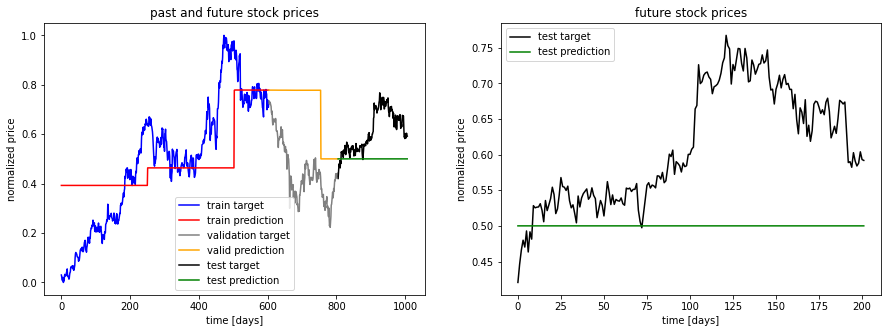

In [188]:
# plot lstm model predictions for baseline  
plot_results(y_train_base, y_train_pred_base, y_val_base, y_val_pred_base, y_test_base, y_test_pred_base)

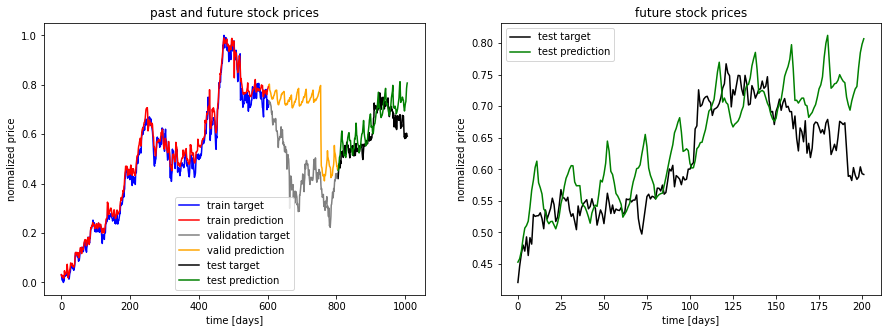

In [189]:
# plot lstm model predictions for sel_features0 feature set  
plot_results(y_train0, y_train_pred0, y_val0, y_val_pred0, y_test0, y_test_pred0)

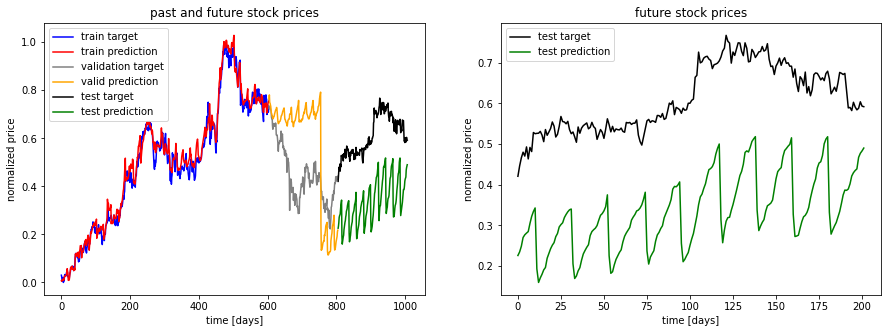

In [191]:
# plot lstm model predictions for sel_features1 feature set  
plot_results(y_train1, y_train_pred1, y_val1, y_val_pred1, y_test1, y_test_pred1)

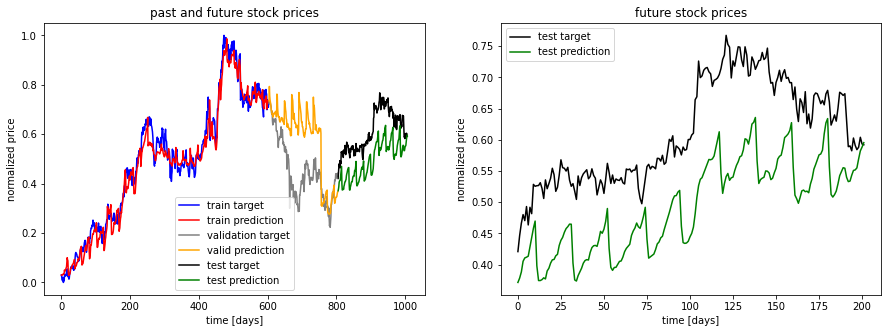

In [192]:
# plot lstm model predictions for sel_features2 feature set  
plot_results(y_train2, y_train_pred2, y_val2, y_val_pred2, y_test2, y_test_pred2)

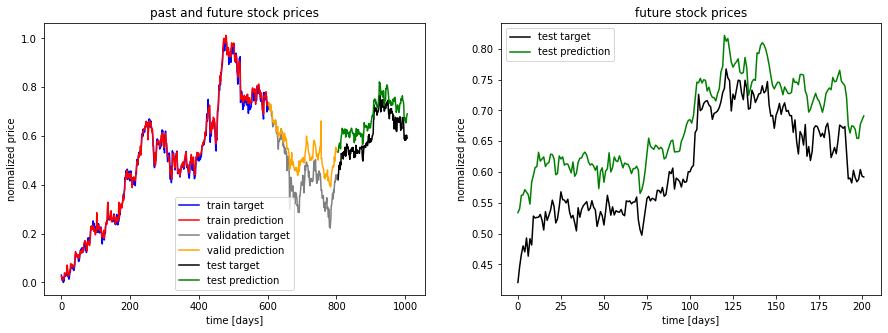

In [193]:
# plot lstm model predictions for sel_features3 feature set  
plot_results(y_train3, y_train_pred3, y_val3, y_val_pred3, y_test3, y_test_pred3)

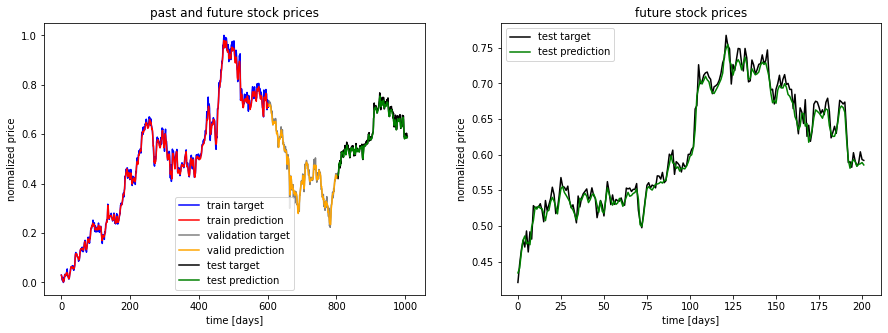

In [194]:
# plot lstm model predictions for single variant feature set  
plot_results(y_train4, y_train_pred4, y_val4, y_val_pred4, y_test4, y_test_pred4)

## Hyperparamter tuning

In [0]:
# create hyperparameter space 
HP_EPOCHS = [5, 15, 25, 35, 45] # worried that 35 is over training 
HP_BATCHES = [5, 10, 32, 100]
HP_NUM_UNITS1 = [25, 50, 75, 100]
HP_NUM_UNITS2 = [25, 50, 75, 100]
HP_NUM_UNITS3 = [25, 50, 75, 100]
HP_OPTIMIZERS = ['rms_prop', 'adam']
HP_ACTIVATION = ['sigmoid', None]

In [0]:
# function to create and train LSTM network for a specific training features set
# code in function for building LSTM from:
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
def train_lstm(train_X, train_y, test_X, test_y): 
  # design network
  model = Sequential([
    layers.LSTM(hparams[HP_NUM_UNITS1], activation='relu', kernel_initializer='he_normal', input_shape=(train_X.shape[1],train_X.shape[2])),
    layers.Dense(hparams[HP_NUM_UNITS2], activation='relu', kernel_initializer='he_normal'),
    layers.Dense(hparams[HP_NUM_UNITS3], activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1, activation=[HP_ACTIVATION])
  ])

  # compile the model
  model.compile(optimizer=hparams[HP_OPTIMIZERS], loss='mse', metrics=['mae'])

  # fit network
  model.fit(train_X, train_y, epochs=hparams[HP_EPOCHS], batch_size=hparams[HP_BATCHES], verbose=2, validation_data=(test_X, test_y))

  # return model
  return model

def test_lstm(model, test_X, test_y):
  # calculate RMSE
  mse, mae = model.evaluate(test_X, test_y, verbose=0)
  print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))
  return [mse, sqrt(mse), mae]

In [0]:
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Conclusions and Findings 

## Feature selection
Models that used the feature section scoring methods, vs manually selecting features, had the highest accuracy. The best scoring method with the highest accuracy was the chi2 method, which obtained the sel_features1 feature set. 